In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
#reading in files
aff = pd.read_csv('affiliations_data.csv', sep = ';')
jus = pd.read_csv('justification_data.csv', sep = ';')

## Affiliations

sorted dataframe by counter

stacked barchart of number of categories per category


In [17]:
count_list = []
#filling all null values with 0
aff= aff.fillna(0)
for index in range(len(aff)):
    count_list.append(aff.iloc[index, 0] + aff.iloc[index, 1]) 

aff['Total count'] = count_list

#change column to sort by 2012 or 2021 exclusively
sort_aff = aff.sort_values(by=['Total count'], ascending = False)

sort_aff.head(10)

,Counter 2012,Counter 2021,Type,Country,Name,Total count
11,7,0.0,gov,USA,NIH,7.0
41,4,0.0,uni,USA,University of Pennsylvania,4.0
10,3,0.0,uni,USA,University of North Carolina at Chapel Hill,3.0
12,3,0.0,gov,China,"NSFC, National Natural Science Foundation of C...",3.0
0,2,0.0,uni,USA,Johns Hopkins University,2.0
20,2,0.0,uni,USA,the University of California,2.0
82,2,0.0,uni,France,University Paris XI,2.0
58,2,0.0,uni,USA,Carnegie Mellon University,2.0
1,2,0.0,gov,USA,NSF,2.0
44,2,0.0,hosp,USA,Children’s Hospital of Philadelphia,2.0


In [20]:
#dictionary with country as key and categories as list items in value

def create_country_cat(df):
    dic = {}
    for index in range(len(df)):
        country = df.iloc[index, 3]
        category = df.iloc[index, 2]
        if country not in dic:         
            dic[country] = [category] #add new empty list if country not in dic
        else: 
            dic[country].append(category)
    return dic


In [23]:
#[gov, uni, hosp, corp, other]
def count_country_cat(dic):
    count_dic = {}
    for key in dic.keys():
        count_list = [0,0,0,0,0]
        for category in dic.get(key):
            if category == 'gov':
                count_list[0]+=1
            elif category == 'uni':
                count_list[1]+=1
            elif category == 'hosp':
                count_list[2]+=1
            elif category == 'corp':
                count_list[3]+=1
            elif category == 'other':
                count_list[4]+=1
        count_dic[key] = count_list
    return count_dic

In [25]:
country_category = count_country_cat(create_country_cat(aff))


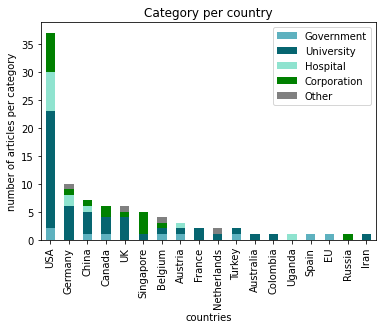

In [61]:
df = pd.DataFrame.from_dict(country_category)

row_names = {0:'Government', 1:'University', 2:'Hospital', 3: 'Corporation', 4:'Other'}

df.rename(index= row_names, inplace=True)

df = df.transpose()

#summing by the max value to be able to sort the table, then deleting column again
df['total'] = df.sum(axis=1)
df = df.sort_values(by = ['total'], ascending = False)
df.drop('total', axis=1, inplace=True)

color_dic = {'Government': '#5eb1bf', 'University': '#066570', 'Hospital': '#8FE3CF', 'Corporation': 'green', 'Other': 'grey'}

fig = df.plot(kind = 'bar', title = 'Category per country', stacked = True, color = color_dic )

fig.set_ylabel("number of articles per category")
fig.set_xlabel("countries")

#want to rotate the xticks, but currently results in overlapping due to different lengths of names
#being centered
#would need to access ax, using fig, ax = plt.subplots() to plot

#plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
#plt.xticks(rotation = 45)

plt.savefig('category per country', bbox_inches='tight')

## Justification

barchart of category and their counts

counter for diseases column

counter for body part

sorted list of disease/task per body part

In [150]:
jus

,year,type,disease,body part,task
0,2012,sci,NaN,all,surgery
1,2012,dis,glaucoma,eyes,NaN
2,2012,nov,cancer,lungs,NaN
3,2012,sci,alzheimers,brain,NaN
4,2012,sci,NaN,cell,metabolic response of cells
5,2012,nov,cancer,prostate,NaN
6,2012,dis,alzheimers,brain,NaN
7,2012,"nov, sci",cancer,brain,NaN
8,2012,sci,NaN,brain,measuring nerve fibers
9,2012,"nov, dis",cancer,skin,NaN


In [151]:
#filling all null values with 0
jus = jus.fillna(0)

In [152]:
def create_dic_of_counts(df, column):
    dic = {}
    option_list= []
    for element in df.iloc[:, column]:
        if element != 0:
            if ',' in element: 
                multiples = element.split(", ")
                for option in multiples:
                    option_list.append(option)
            else:
                option_list.append(element)
    for option in option_list:
        if option not in dic:
            dic[option] = 1
        else:
            dic[option] = dic.get(option) + 1 
    return dic

In [153]:
cat = create_dic_of_counts(jus, 1)
disease = create_dic_of_counts(jus, 2)
body_part = create_dic_of_counts(jus, 3)

In [161]:
body_part

{'all': 3,
 'eyes': 2,
 'lungs': 2,
 'brain': 14,
 'cell': 6,
 'prostate': 1,
 'skin': 2,
 'breast': 1,
 'heart': 3,
 'spine': 1,
 'colorectal': 1}

In [116]:
df = pd.DataFrame.from_dict([cat])

column_names = {'sci':'Science based', 'dis':'Disease based', 'nov':'Novel approach'}

df.rename(columns= column_names, inplace=True)

In [117]:
df

,Science based,Disease based,Novel approach
0,23,11,9


In [121]:
sort_jus = jus.sort_values(by = ['body part', 'disease'])

In [122]:
sort_jus

,year,type,disease,body part,task
0,2012,sci,0,all,surgery
16,2012,"nov, sci",0,all,"detect regional differences in images, for dif..."
23,2012,sci,0,all,surgery robotic
8,2012,sci,0,brain,measuring nerve fibers
17,2012,sci,0,brain,population based pattern recognition brain in ...
24,2012,dis,0,brain,neonate brain mapping
26,2012,sci,0,brain,different applications
3,2012,sci,alzheimers,brain,0
6,2012,dis,alzheimers,brain,0
25,2012,"dis, sci",alzheimers,brain,0


In [159]:
body_dic={}
for index in range(len(jus)):
    #initialising the dictionary with an empty string
    if jus.iloc[index, 3] != 0:
        if jus.iloc[index, 3] not in body_dic:
            body_dic[jus.iloc[index, 3]] = ''  
        
for index in range(len(jus)):
    check_list = body_dic.get(jus.iloc[index, 3])
    if jus.iloc[index, 2] != 0 and jus.iloc[index, 2] not in check_list:
        #only adding the disease once
        check_list = check_list + ", " +jus.iloc[index, 2]
        body_dic[jus.iloc[index, 3]] = check_list
    elif jus.iloc[index, 2] == 0:
        body_dic[jus.iloc[index, 3]] = body_dic.get(jus.iloc[index, 3])+ ", " +jus.iloc[index, 4]

In [160]:
body_dic

{'all': ', surgery, detect regional differences in images, for different diseases, surgery robotic',
 'eyes': ', glaucoma , location of foveola for different diseases',
 'lungs': ', cancer, tuberculosis',
 'brain': ", alzheimers, cancer, measuring nerve fibers, population based pattern recognition brain in particular, mild cognitive impairment, autism, multiple sclerosis, neonate brain mapping, different applications, parkinson's disease",
 'cell': ', metabolic response of cells, cell death event detection, cell feature analysis, cell detection, vesicle fusion/undocking, phase contrast microscopy',
 'prostate': ', cancer',
 'skin': ', cancer',
 'breast': ', cancer',
 'heart': ', capturing morphological changes over time, coronary artery disease',
 'spine': ', verebral body fractures',
 'colorectal': ', cancer'}